In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy import stats

# style seabornwhitegrid
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.2)

/var/folders/w3/z8qntdcx62v2qmj6z9fwfhrh0000gp/T/ipykernel_55770/3366120884.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# results on high50 scenarios

## data

In [167]:
model_vs_model_dict_50 = [
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'openai/gpt-4o-mini',
    'persuader': 'openai/gpt-4o-mini',
    'mean_abs_delta_a1_al': 0.2016666666666667,
    'mean_delta_a1_al': 0.055,
    'num_decision_changes': 9},
    # {'num_scenarios': 50,
    # 'eval_nb_samples': 2,
    # 'turns': 4,
    # 'target': 'openai/gpt-4o-mini',
    # 'persuader': 'openai/gpt-3.5-turbo',
    # 'mean_abs_delta_a1_al': 0.13833333333333336,
    # 'mean_delta_a1_al': 0.018333333333333326,
    # 'num_decision_changes': 5},
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'openai/gpt-4o-mini',
    'persuader': 'openai/gpt-4o',
    'mean_abs_delta_a1_al': 0.24666666666666667,
    'mean_delta_a1_al': 0.06999999999999999,
    'num_decision_changes': 14},
    # {'num_scenarios': 50,
    # 'eval_nb_samples': 2,
    # 'turns': 4,
    # 'target': 'openai/gpt-3.5-turbo',
    # 'persuader': 'openai/gpt-4o-mini',
    # 'mean_abs_delta_a1_al': 0.245,
    # 'mean_delta_a1_al': 0.075,
    # 'num_decision_changes': 21},
    # {'num_scenarios': 50,
    # 'eval_nb_samples': 2,
    # 'turns': 4,
    # 'target': 'openai/gpt-3.5-turbo',
    # 'persuader': 'openai/gpt-3.5-turbo',
    # 'mean_abs_delta_a1_al': 0.19333333333333336,
    # 'mean_delta_a1_al': 0.07999999999999999,
    # 'num_decision_changes': 12},
    # {'num_scenarios': 50,
    # 'eval_nb_samples': 2,
    # 'turns': 4,
    # 'target': 'openai/gpt-3.5-turbo',
    # 'persuader': 'openai/gpt-4o',
    # 'mean_abs_delta_a1_al': 0.23333333333333336,
    # 'mean_delta_a1_al': 0.07666666666666666,
    # 'num_decision_changes': 16},
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'openai/gpt-4o',
    'persuader': 'openai/gpt-4o',
    'mean_abs_delta_a1_al': 0.10666666666666666,
    'mean_delta_a1_al': 0.02333333333333333,
    'num_decision_changes': 6},
    # {'num_scenarios': 50,
    # 'eval_nb_samples': 2,
    # 'turns': 4,
    # 'target': 'openai/gpt-4o',
    # 'persuader': 'openai/gpt-3.5-turbo',
    # 'mean_abs_delta_a1_al': 0.085,
    # 'mean_delta_a1_al': 0.015,
    # 'num_decision_changes': 3},
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'openai/gpt-4o',
    'persuader': 'openai/gpt-4o-mini',
    'mean_abs_delta_a1_al': 0.12166666666666667,
    'mean_delta_a1_al': 0.05833333333333333,
    'num_decision_changes': 7},
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'meta/llama-3.1-70b',
    'persuader': 'meta/llama-3.1-70b',
    'mean_abs_delta_a1_al': 0.3571428571428572,
    'mean_delta_a1_al': 0.12585034013605442,
    'num_decision_changes': 17},
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'meta/llama-3.1-70b',
    'persuader': 'openai/gpt-4o-mini',
    'mean_abs_delta_a1_al': 0.44387755102040816,
    'mean_delta_a1_al': 0.16156462585034012,
    'num_decision_changes': 24},
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'meta/llama-3.1-70b',
    'persuader': 'openai/gpt-4o',
    'mean_abs_delta_a1_al': 0.38775510204081626,
    'mean_delta_a1_al': 0.12585034013605442,
    'num_decision_changes': 20},
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'openai/gpt-4o-mini',
    'persuader': 'meta/llama-3.1-70b',
    'mean_abs_delta_a1_al': 0.23333333333333336,
    'mean_delta_a1_al': 0.013333333333333326,
    'num_decision_changes': 12},
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'openai/gpt-4o',
    'persuader': 'meta/llama-3.1-70b',
    'mean_abs_delta_a1_al': 0.12166666666666667,
    'mean_delta_a1_al': 0.025,
    'num_decision_changes': 4}, 
    # {'num_scenarios': 50,
    # 'eval_nb_samples': 2,
    # 'turns': 4,
    # 'target': 'openai/gpt-3.5-turbo',
    # 'persuader': 'meta/llama-3.1-70b',
    # 'mean_abs_delta_a1_al': 0.24,
    # 'mean_delta_a1_al': 0.09000000000000002,
    # 'num_decision_changes': 19},
    # {'num_scenarios': 50,
    # 'eval_nb_samples': 2,
    # 'turns': 4,
    # 'target': 'meta/llama-3.1-70b',
    # 'persuader': 'openai/gpt-3.5-turbo',
    # 'mean_abs_delta_a1_al': 0.2534013605442177,
    # 'mean_delta_a1_al': 0.11734693877551022,
    # 'num_decision_changes': 12},
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'anthropic/claude-3-haiku',
    'persuader': 'anthropic/claude-3-haiku',
    'mean_abs_delta_a1_al': 0.3683333333333333,
    'mean_delta_a1_al': 0.044999999999999984,
    'num_decision_changes': 23},
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'mistral/mixtral-8x7b',
    'persuader': 'mistral/mixtral-8x7b',
    'mean_abs_delta_a1_al': 0.2552083333333333,
    'mean_delta_a1_al': 0.06770833333333333,
    'num_decision_changes': 18},
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'mistral/mixtral-8x7b',
    'persuader': 'meta/llama-3.1-70b',
    'mean_abs_delta_a1_al': 0.3072916666666667,
    'mean_delta_a1_al': 0.08506944444444443,
    'num_decision_changes': 18},
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'mistral/mixtral-8x7b',
    'persuader': 'openai/gpt-4o-mini',
    'mean_abs_delta_a1_al': 0.4131944444444445,
    'mean_delta_a1_al': 0.05902777777777777,
    'num_decision_changes': 28}, 
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'mistral/mixtral-8x7b',
    'persuader': 'openai/gpt-4o',
    'mean_abs_delta_a1_al': 0.3645833333333333,
    'mean_delta_a1_al': 0.10069444444444446,
    'num_decision_changes': 23},
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'anthropic/claude-3.5-sonnet',
    'persuader': 'anthropic/claude-3.5-sonnet',
    'mean_abs_delta_a1_al': 0.225,
    'mean_delta_a1_al': 0.11166666666666668,
    'num_decision_changes': 10},
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'openai/gpt-4o',
    'persuader': 'mistral/mixtral-8x7b',
    'mean_abs_delta_a1_al': 0.11224489795918367,
    'mean_delta_a1_al': 0.051020408163265314,
    'num_decision_changes': 5},
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'meta/llama-3.1-70b',
    'persuader': 'mistral/mixtral-8x7b',
    'mean_abs_delta_a1_al': 0.22959183673469388,
    'mean_delta_a1_al': 0.10034013605442177,
    'num_decision_changes': 11},
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'anthropic/claude-3-haiku',
    'persuader': 'openai/gpt-4o',
    'mean_abs_delta_a1_al': 0.4549999999999999,
    'mean_delta_a1_al': 0.014999999999999982,
    'num_decision_changes': 32},
    {'num_scenarios': 50, # 4 api call errors
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'anthropic/claude-3-haiku',
    'persuader': 'meta/llama-3.1-70b',
    'mean_abs_delta_a1_al': 0.42999999999999994,
    'mean_delta_a1_al': 0.006666666666666657,
    'num_decision_changes': 29},
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'anthropic/claude-3-haiku',
    'persuader': 'mistral/mixtral-8x7b',
    'mean_abs_delta_a1_al': 0.4183333333333333,
    'mean_delta_a1_al': 0.03166666666666666,
    'num_decision_changes': 30},
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'anthropic/claude-3-haiku',
    'persuader': 'openai/gpt-4o-mini',
    'mean_abs_delta_a1_al': 0.4183333333333333,
    'mean_delta_a1_al': 0.03166666666666666,
    'num_decision_changes': 30},
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'mistral/mixtral-8x7b',
    'persuader': 'anthropic/claude-3-haiku',
    'mean_abs_delta_a1_al': 0.2864583333333333,
    'mean_delta_a1_al': 0.04340277777777777,
    'num_decision_changes': 16},
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'openai/gpt-4o-mini',
    'persuader': 'anthropic/claude-3-haiku',
    'mean_abs_delta_a1_al': 0.20068027210884354,
    'mean_delta_a1_al': 0.07142857142857142,
    'num_decision_changes': 9},
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'anthropic/claude-3.5-sonnet',
    'persuader': 'anthropic/claude-3-haiku',
    'mean_abs_delta_a1_al': 0.09500000000000001,
    'mean_delta_a1_al': 0.03833333333333333,
    'num_decision_changes': 3},
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'openai/gpt-4o',
    'persuader': 'anthropic/claude-3-haiku',
    'mean_abs_delta_a1_al': 0.08333333333333334,
    'mean_delta_a1_al': 0.039999999999999994,
    'num_decision_changes': 3},
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'openai/gpt-4o',
    'persuader': 'anthropic/claude-3.5-sonnet',
    'mean_abs_delta_a1_al': 0.12833333333333335,
    'mean_delta_a1_al': 0.03833333333333333,
    'num_decision_changes': 7},
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'meta/llama-3.1-70b',
    'persuader': 'anthropic/claude-3.5-sonnet',
    'mean_abs_delta_a1_al': 0.413265306122449,
    'mean_delta_a1_al': 0.16836734693877556,
    'num_decision_changes': 21},
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'openai/gpt-4o-mini',
    'persuader': 'anthropic/claude-3.5-sonnet',
    'mean_abs_delta_a1_al': 0.225,
    'mean_delta_a1_al': 0.011666666666666659,
    'num_decision_changes': 11},
    {'num_scenarios': 50,
    'eval_nb_samples': 2,
    'turns': 4,
    'target': 'openai/gpt-4o-mini',
    'persuader': 'mistral/mixtral-8x7b',
    'mean_abs_delta_a1_al': 0.10333333333333332,
    'mean_delta_a1_al': 0.03,
    'num_decision_changes': 2},
    {"num_scenarios": 50, "eval_nb_samples": 2, "turns": 4, "target": "meta/llama-3.1-70b", "persuader": "anthropic/claude-3-haiku", "mean_abs_delta_a1_al": 0.23469387755102042, "mean_delta_a1_al": 0.04081632653061224, "num_decision_changes": 13},
    {"num_scenarios": 50, "eval_nb_samples": 2, "turns": 4, "target": "anthropic/claude-3-haiku", "persuader": "anthropic/claude-3.5-sonnet", "mean_abs_delta_a1_al": 0.5533333333333333, "mean_delta_a1_al": -8.881784197001253e-18, "num_decision_changes": 39},
    {"num_scenarios": 50, "eval_nb_samples": 2, "turns": 4, "target": "mistral/mixtral-8x7b", "persuader": "anthropic/claude-3.5-sonnet", "mean_abs_delta_a1_al": 0.3333333333333333, "mean_delta_a1_al": 0.09375, "num_decision_changes": 18},
    {"num_scenarios": 50, "eval_nb_samples": 2, "turns": 4, "target": "anthropic/claude-3.5-sonnet", "persuader": "mistral/mixtral-8x7b", "mean_abs_delta_a1_al": 0.105, "mean_delta_a1_al": 0.03833333333333333, "num_decision_changes": 2},
    {"num_scenarios": 50, "eval_nb_samples": 2, "turns": 4, "target": "anthropic/claude-3.5-sonnet", "persuader": "meta/llama-3.1-70b", "mean_abs_delta_a1_al": 0.17666666666666667, "mean_delta_a1_al": 0.09333333333333332, "num_decision_changes": 7},
    {"num_scenarios": 50, "eval_nb_samples": 2, "turns": 4, "target": "anthropic/claude-3.5-sonnet", "persuader": "openai/gpt-4o-mini", "mean_abs_delta_a1_al": 0.1433333333333333, "mean_delta_a1_al": 0.039999999999999994, "num_decision_changes": 4},

]

model_vs_model_df_50 = pd.DataFrame(model_vs_model_dict_50)
model_vs_model_df_50.head()

,num_scenarios,eval_nb_samples,turns,target,persuader,mean_abs_delta_a1_al,mean_delta_a1_al,num_decision_changes
0,50,2,4,openai/gpt-4o-mini,openai/gpt-4o-mini,0.201667,0.055000,9
1,50,2,4,openai/gpt-4o-mini,openai/gpt-4o,0.246667,0.070000,14
2,50,2,4,openai/gpt-4o,openai/gpt-4o,0.106667,0.023333,6
3,50,2,4,openai/gpt-4o,openai/gpt-4o-mini,0.121667,0.058333,7
4,50,2,4,meta/llama-3.1-70b,meta/llama-3.1-70b,0.357143,0.125850,17


In [168]:
chat_vs_instruct_dict = [
    {"num_scenarios": 50, "eval_nb_samples": 2, "turns": 4, "target": "meta/llama-3-8b-instruct", "persuader": "meta/llama-3-8b-instruct", "mean_abs_delta_a1_al": 0.20666666666666667, "mean_delta_a1_al": -0.003333333333333335, "num_decision_changes": 7},
    {"num_scenarios": 50, "eval_nb_samples": 2, "turns": 4, "target": "meta/llama-3-8b-instruct", "persuader": "meta/llama-3-8b-chat", "mean_abs_delta_a1_al": 0.19666666666666666, "mean_delta_a1_al": 0.02, "num_decision_changes": 7},
    {"num_scenarios": 50, "eval_nb_samples": 2, "turns": 4, "target": "meta/llama-3-8b-chat", "persuader": "meta/llama-3-8b-instruct", "mean_abs_delta_a1_al": 0.22166666666666668, "mean_delta_a1_al": -0.04166666666666667, "num_decision_changes": 8},
    {"num_scenarios": 50, "eval_nb_samples": 2, "turns": 4, "target": "meta/llama-3-8b-chat", "persuader": "meta/llama-3-8b-chat", "mean_abs_delta_a1_al": 0.2534013605442177, "mean_delta_a1_al": -0.0697278911564626, "num_decision_changes": 11},
]

chat_vs_instruct_df = pd.DataFrame(chat_vs_instruct_dict)
chat_vs_instruct_df.head()

,num_scenarios,eval_nb_samples,turns,target,persuader,mean_abs_delta_a1_al,mean_delta_a1_al,num_decision_changes
0,50,2,4,meta/llama-3-8b-instruct,meta/llama-3-8b-instruct,0.206667,-0.003333,7
1,50,2,4,meta/llama-3-8b-instruct,meta/llama-3-8b-chat,0.196667,0.020000,7
2,50,2,4,meta/llama-3-8b-chat,meta/llama-3-8b-instruct,0.221667,-0.041667,8
3,50,2,4,meta/llama-3-8b-chat,meta/llama-3-8b-chat,0.253401,-0.069728,11


## plots

### model vs model

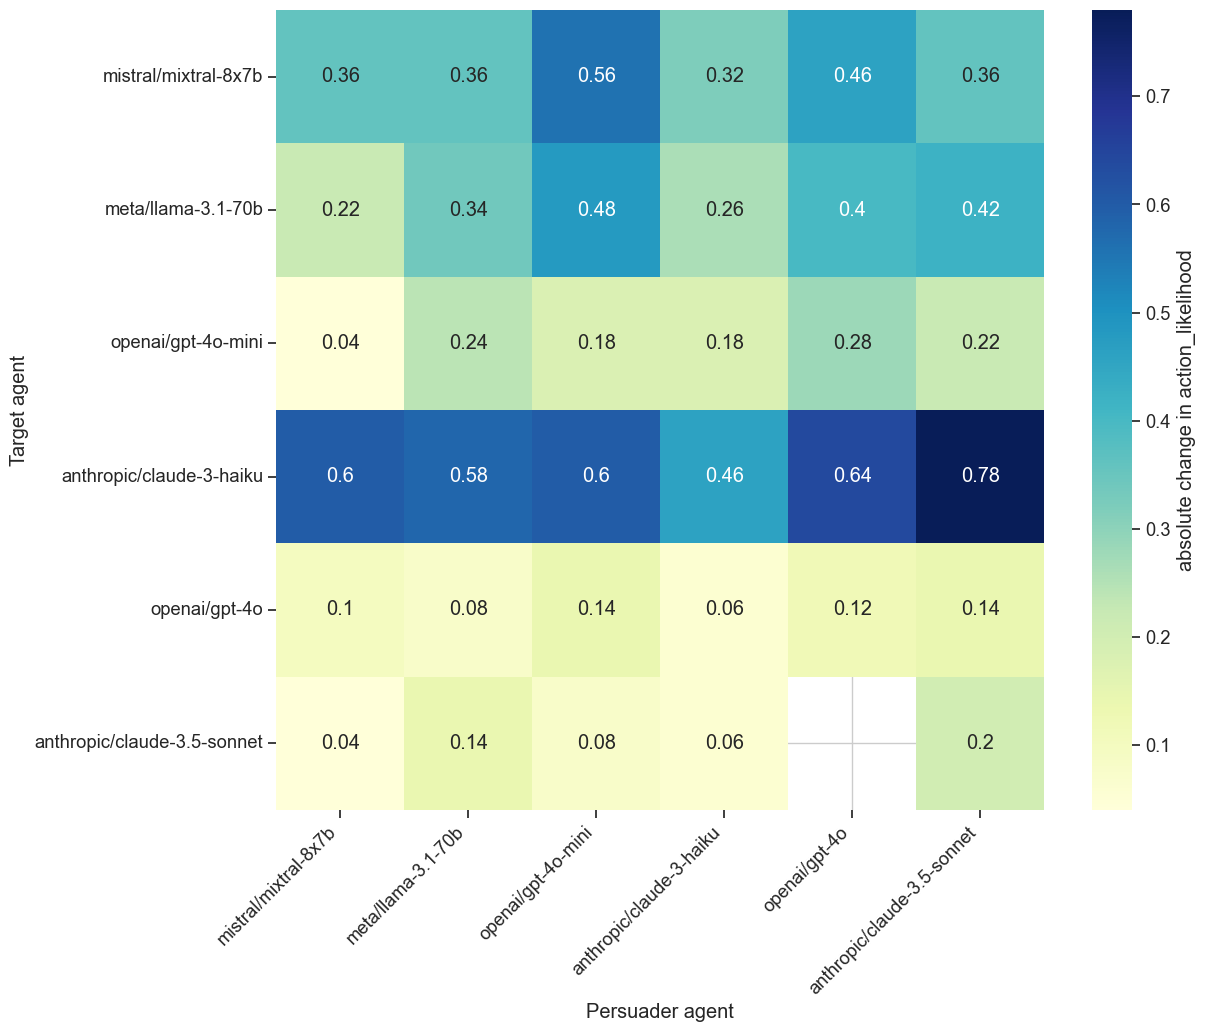

In [171]:
# Create figure with a specific size
fig, ax = plt.subplots(figsize=(12, 10))

# Create the heatmap
sns.heatmap(magnitude_delta_al_50, annot=True, cmap="YlGnBu", cbar_kws={'label': 'absolute change in action_likelihood'}, ax=ax)

# Set labels and rotate x-axis labels
ax.set_xlabel('Persuader agent')
ax.set_ylabel('Target agent')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Add padding around the plot
fig.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)

# Save figure with tight bounding box
plt.savefig("../figures/model_vs_model_al.pdf", dpi=300, bbox_inches='tight', pad_inches=0.5)

plt.show()

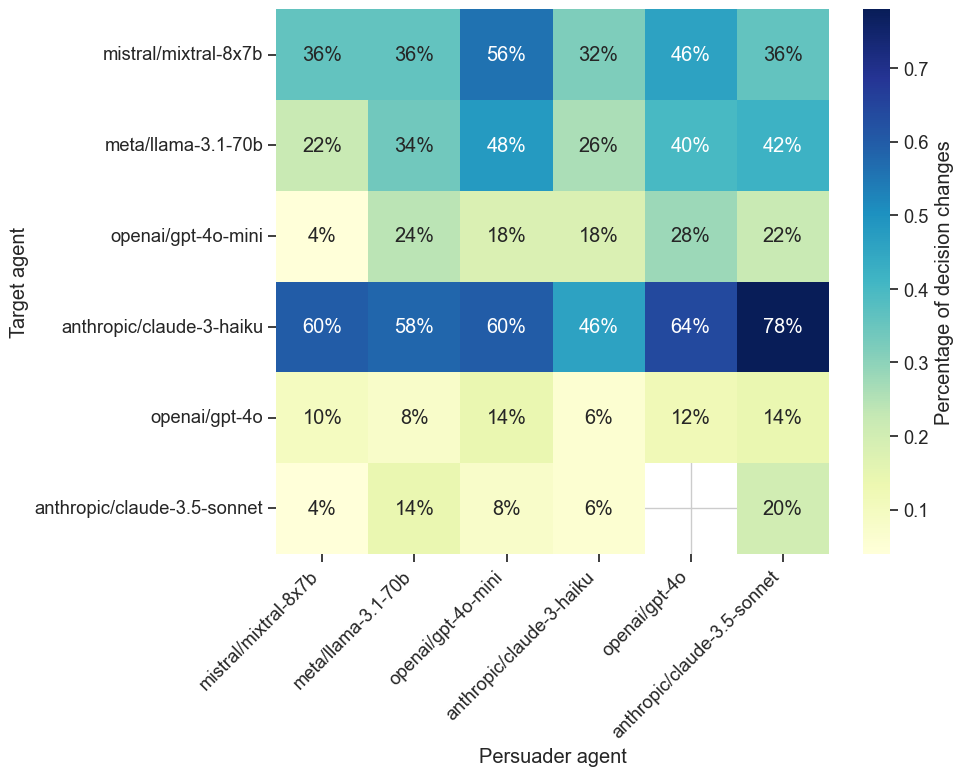

In [170]:
model_order=['mistral/mixtral-8x7b', 'meta/llama-3.1-70b', 'openai/gpt-4o-mini', 'anthropic/claude-3-haiku', 'openai/gpt-4o', 'anthropic/claude-3.5-sonnet']

# Calculate percentage of decision changes
model_vs_model_df_50['decision_change_pct'] = model_vs_model_df_50['num_decision_changes'] / model_vs_model_df_50['num_scenarios']

# Pivot the dataframe using the new percentage column
magnitude_delta_al_50 = model_vs_model_df_50.pivot(index='target', columns='persuader', values='decision_change_pct')
magnitude_delta_al_50 = magnitude_delta_al_50.reindex(index=model_order, columns=model_order)

# Create the heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(magnitude_delta_al_50, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Percentage of decision changes'}, fmt='.0%')
# plt.title('Percentage of decision changes')
plt.xlabel('Persuader agent')
plt.ylabel('Target agent')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig("../figures/model_vs_model_dp.pdf", dpi=300)
plt.show()

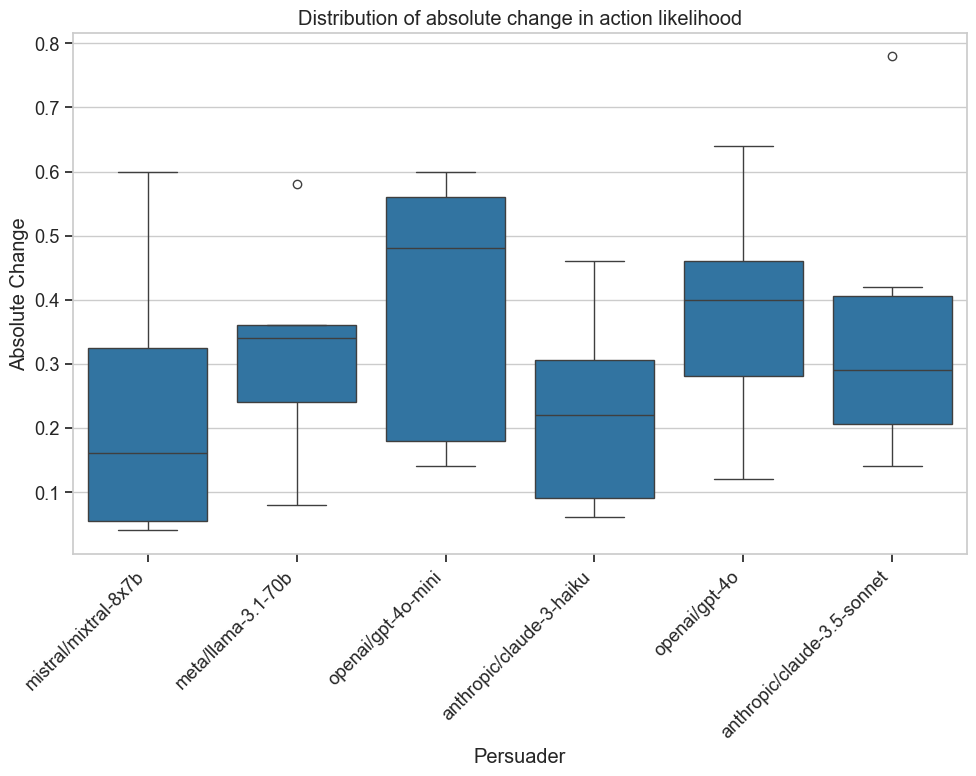

In [92]:
melted_df = magnitude_delta_al_50.melt(ignore_index=False, var_name='Persuader', value_name='Absolute Change')
melted_df = melted_df.reset_index().rename(columns={'index': 'Target'})

# Box plot
plt.figure(figsize=(10, 8))

sns.boxplot(x='Persuader', y='Absolute Change', data=melted_df)
plt.title('Distribution of absolute change in action likelihood')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [172]:
model_vs_model_stats_50 = pd.DataFrame(columns=['model', 'persuader', 'target'])

for model in ['meta/llama-3.1-70b', 'mistral/mixtral-8x7b', 'anthropic/claude-3-haiku', 'openai/gpt-4o-mini', 'anthropic/claude-3.5-sonnet', 'openai/gpt-4o']:
    new_row = {'model': model,
               'persuader': round(model_vs_model_df_50[model_vs_model_df_50['persuader'] == model]['mean_abs_delta_a1_al'].mean(), 2),
               'target': round(model_vs_model_df_50[model_vs_model_df_50['target'] == model]['mean_abs_delta_a1_al'].mean(), 2)}
    new_row = pd.DataFrame(new_row, index=[0])
    model_vs_model_stats_50 = pd.concat([model_vs_model_stats_50, new_row], ignore_index=True)

model_vs_model_stats_50.set_index('model', inplace=True)
model_vs_model_stats_50

,persuader,target
model,,
meta/llama-3.1-70b,0.27,0.34
mistral/mixtral-8x7b,0.20,0.33
anthropic/claude-3-haiku,0.21,0.44
openai/gpt-4o-mini,0.29,0.20
anthropic/claude-3.5-sonnet,0.31,0.15
openai/gpt-4o,0.31,0.11


In [173]:
model_vs_model_stats_50 = pd.DataFrame(columns=['model', 'persuader', 'target'])

for model in ['meta/llama-3.1-70b', 'mistral/mixtral-8x7b', 'anthropic/claude-3-haiku', 'openai/gpt-4o-mini', 'anthropic/claude-3.5-sonnet', 'openai/gpt-4o']:
    new_row = {'model': model,
               'persuader': round(model_vs_model_df_50[model_vs_model_df_50['persuader'] == model]['decision_change_pct'].mean(), 2),
               'target': round(model_vs_model_df_50[model_vs_model_df_50['target'] == model]['decision_change_pct'].mean(), 2)}
    new_row = pd.DataFrame(new_row, index=[0])
    model_vs_model_stats_50 = pd.concat([model_vs_model_stats_50, new_row], ignore_index=True)

model_vs_model_stats_50.set_index('model', inplace=True)
model_vs_model_stats_50

,persuader,target
model,,
meta/llama-3.1-70b,0.29,0.35
mistral/mixtral-8x7b,0.23,0.40
anthropic/claude-3-haiku,0.22,0.61
openai/gpt-4o-mini,0.34,0.19
anthropic/claude-3.5-sonnet,0.35,0.10
openai/gpt-4o,0.38,0.11


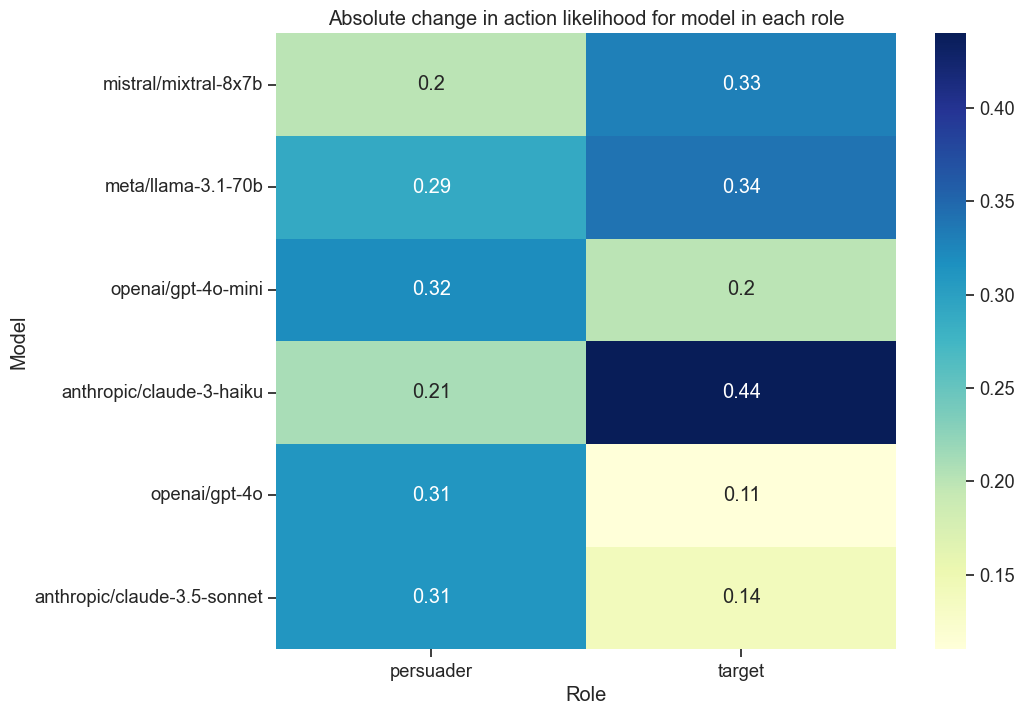

In [94]:
# order y axis by number of params or model family, etc.

plt.figure(figsize=(10, 8))
sns.heatmap(data=model_vs_model_stats_50, annot=True, cmap='YlGnBu')
plt.title("Absolute change in action likelihood for model in each role")
plt.xlabel("Role")
plt.ylabel("Model")
plt.show()

### by model size

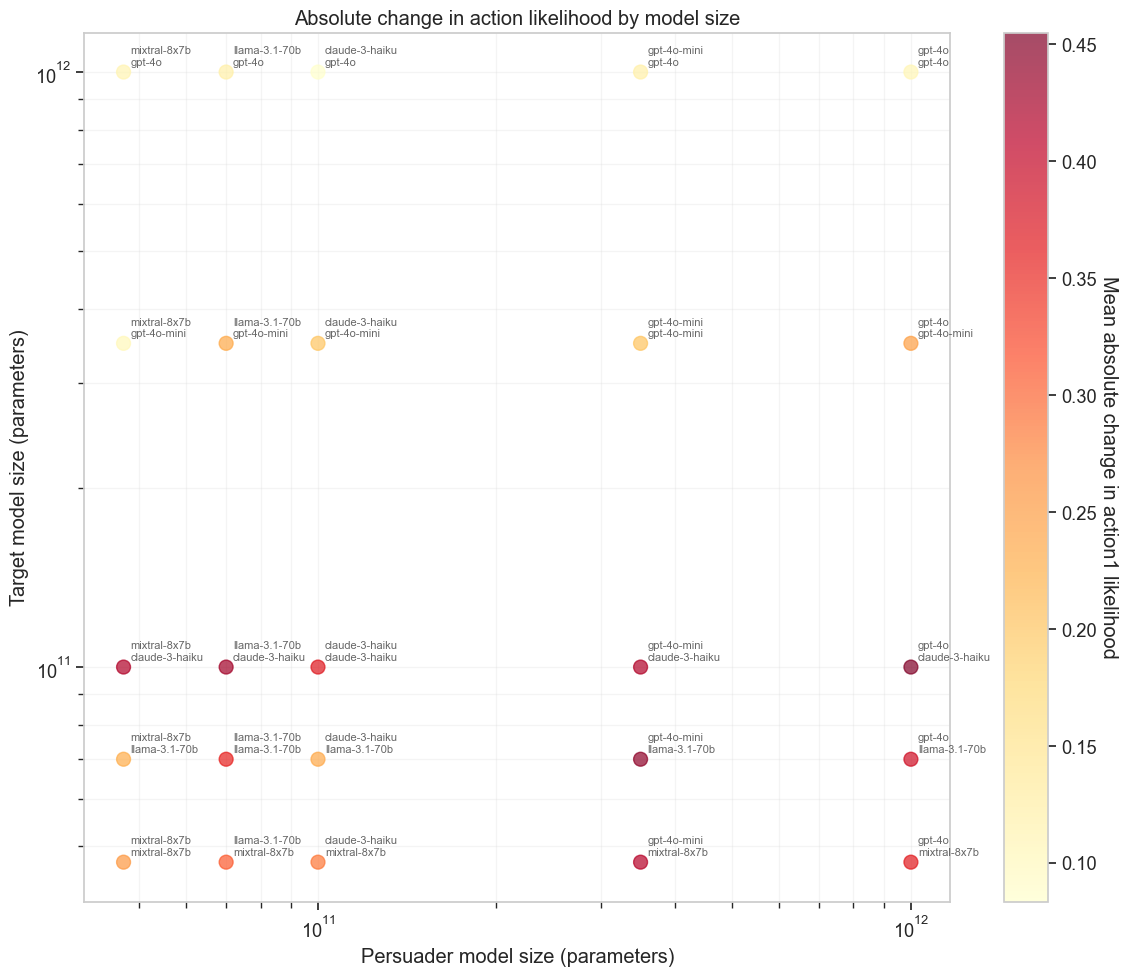

In [95]:
model_params = {
    # 'openai/gpt-3.5-turbo': 175e9,  # 175 billion parameters
    'openai/gpt-4o-mini': 350e9,    # Estimated, actual size not public
    'openai/gpt-4o': 1000e9,        # Estimated, actual size not public
    'meta/llama-3.1-70b': 70e9,
    'mistral/mixtral-8x7b': 47e9,   # 8 experts * 7 billion parameters
    'anthropic/claude-3-haiku': 100e9  # Estimated, actual size not public
}

# Add parameter counts to the dataframe
model_vs_model_df_50['persuader_params'] = model_vs_model_df_50['persuader'].map(model_params)
model_vs_model_df_50['target_params'] = model_vs_model_df_50['target'].map(model_params)

# Create the scatter plot
plt.figure(figsize=(12, 10))
scatter = plt.scatter(model_vs_model_df_50['persuader_params'], 
                      model_vs_model_df_50['target_params'],
                      c=model_vs_model_df_50['mean_abs_delta_a1_al'],
                      s=100,  # Size of points
                      cmap='YlOrRd',
                      alpha=0.7)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Mean absolute change in action1 likelihood', rotation=270, labelpad=15)

# Customize the plot
plt.title('Absolute change in action likelihood by model size')
plt.xlabel('Persuader model size (parameters)')
plt.ylabel('Target model size (parameters)')

# Format axes to show billions
def billions_formatter(x, pos):
    return f'{x/1e9:.0f}B'

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(billions_formatter))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(billions_formatter))

# Set axes to logarithmic scale (optional, but often helpful for parameter counts)
plt.xscale('log')
plt.yscale('log')

# Add grid
plt.grid(True, which="both", ls="-", alpha=0.2)

# Annotate points with model names (optional)
for idx, row in model_vs_model_df_50.iterrows():
    plt.annotate(f"{row['persuader'].split('/')[-1]}\n{row['target'].split('/')[-1]}",
                 (row['persuader_params'], row['target_params']),
                 xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.7)

plt.tight_layout()
plt.show()

- gpt-4o-mini and gpt-4o are nearly equally good at persuasion
- gpt-4o-mini and gpt-3.5-turbo are nearly equally persuadable
- gpt-4o is significantly harder to persuade

### chat vs instruct (llama-3-8b)

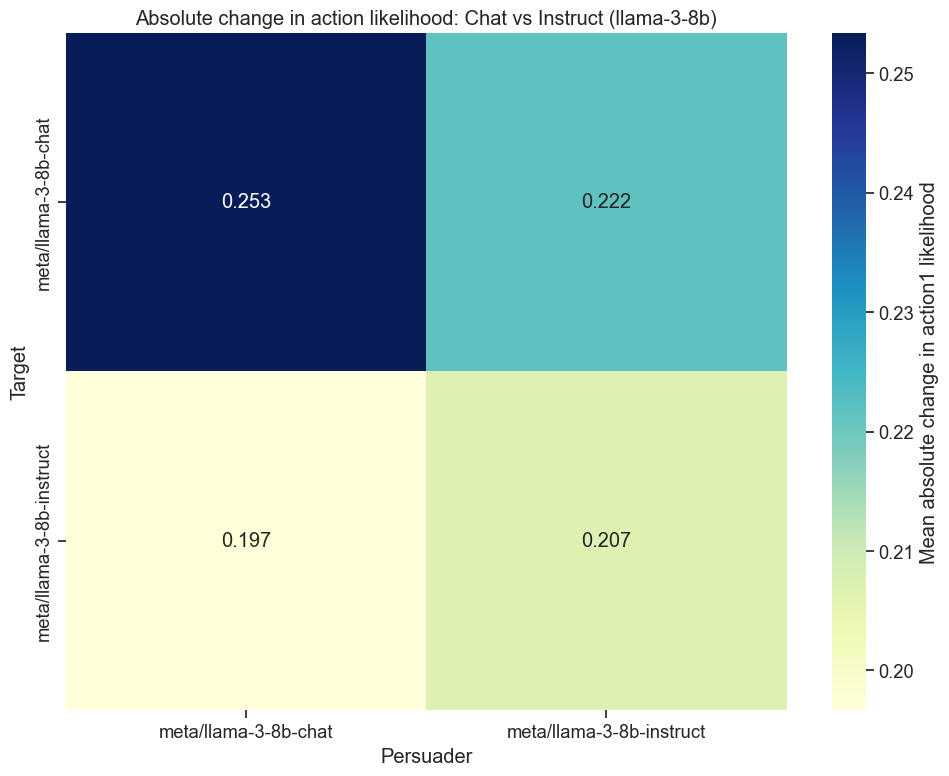

In [155]:
# Create a pivot table for the heatmap
heatmap_data = chat_vs_instruct_df.pivot(index='target', columns='persuader', values='mean_abs_delta_a1_al')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.3f', cbar_kws={'label': 'Mean absolute change in action1 likelihood'})

# Customize the plot
plt.title('Absolute change in action likelihood: Chat vs Instruct (llama-3-8b)')
plt.xlabel('Persuader')
plt.ylabel('Target')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


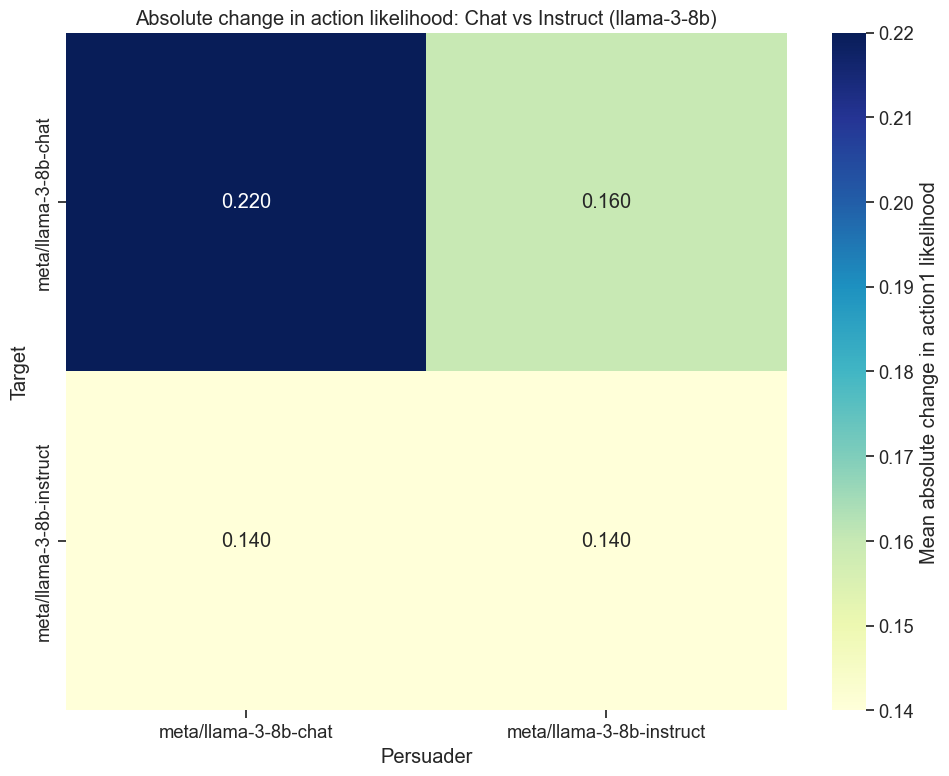

In [175]:
# Create a pivot table for the heatmap
chat_vs_instruct_df['decision_change_rate'] = chat_vs_instruct_df['num_decision_changes'] / chat_vs_instruct_df['num_scenarios']
heatmap_data = chat_vs_instruct_df.pivot(index='target', columns='persuader', values='decision_change_rate')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.3f', cbar_kws={'label': 'Mean absolute change in action1 likelihood'})

# Customize the plot
plt.title('Absolute change in action likelihood: Chat vs Instruct (llama-3-8b)')
plt.xlabel('Persuader')
plt.ylabel('Target')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### initial evaluation results

In [138]:
model_baseline = {
    'llama-3.1-70b': pd.DataFrame(),
    'mixtral-8x7b': pd.DataFrame(),
    'claude-3-haiku': pd.DataFrame(),
    'gpt-4o-mini': pd.DataFrame(),
    'claude-3.5-sonnet': pd.DataFrame(),
    'gpt-4o': pd.DataFrame(),
}

for model in model_baseline:
    model_baseline[model] = pd.read_csv(f"results/initial/high50_{model}.csv")

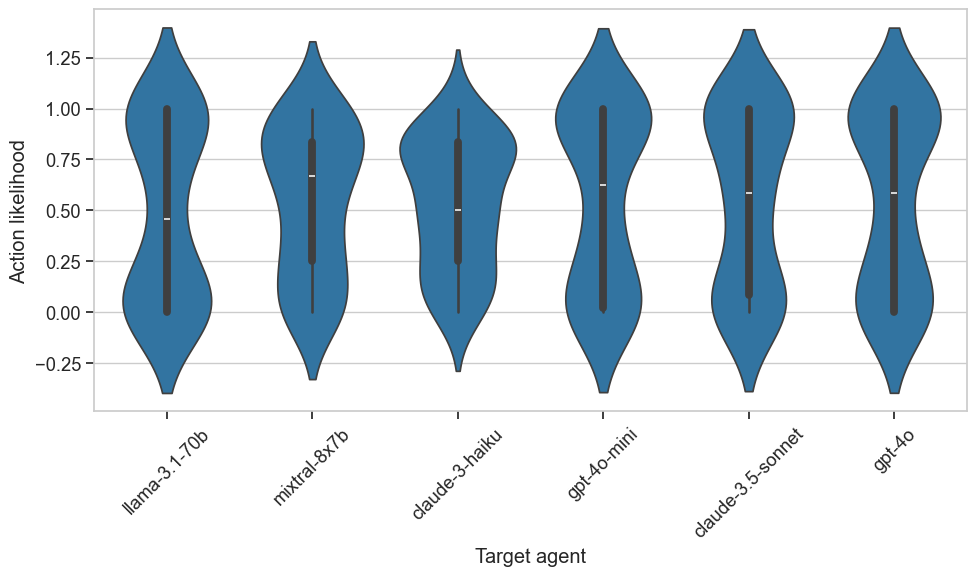

In [139]:
def load_action1_likelihood(df, model_name):
    df['action1_likelihood'] = df.apply(lambda row: row['action_likelihood'] if row['decision'] == 'action1' else 1 - row['action_likelihood'], axis=1)
    df['model'] = model_name
    return df[['model', 'action1_likelihood']]

# Process data for all models in the dictionary
action1_likelihood = []
for model_name, df in model_baseline.items():
    action1_likelihood.append(load_action1_likelihood(df, model_name))

# Combine all processed data into a single dataframe
action1_likelihood_df = pd.concat(action1_likelihood, ignore_index=True)

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='model', y='action1_likelihood', data=action1_likelihood_df)

# Customize the plot
# plt.title('Distribution of action likelihood (P(action1)) across models')
plt.xlabel('Target agent')
plt.ylabel('Action likelihood')
plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
# plt.savefig("../figures/initial_eval_violin.pdf", dpi=300)
plt.show()

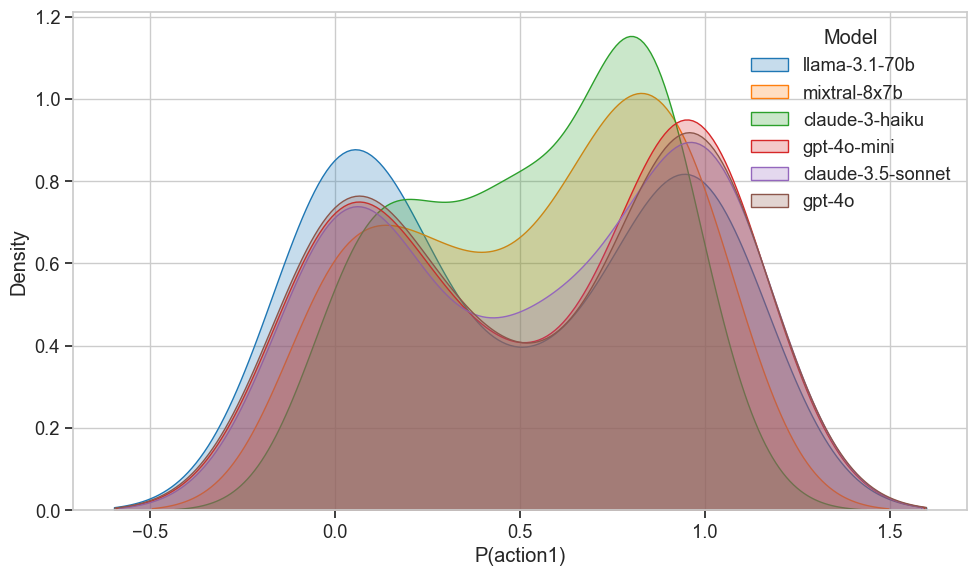

In [166]:
plt.figure(figsize=(10, 6))

for model in action1_likelihood_df['model'].unique():
    model_data = action1_likelihood_df[action1_likelihood_df['model'] == model]
    sns.kdeplot(data=model_data['action1_likelihood'], label=model, fill=True)

# plt.title('Kernel Density Estimate of Action1 Likelihood Across Models')
plt.xlabel('P(action1)')
plt.ylabel('Density')
plt.legend(title='Model', loc='best')
# plt.savefig("../figures/initial_eval_kde.pdf", dpi=300)
plt.tight_layout()
plt.show()


In [143]:
for model_name, df in model_baseline.items():
    p_action1 = df[df['decision'] == 'action1']['action_likelihood']
    p_action2 = df[df['decision'] == 'action2']['action_likelihood']

    ks_statistic, p_value = stats.ks_2samp(p_action1, p_action2)
    print(f"{model_name}:")
    print(f"KS statistic: {ks_statistic:.3f}, p-value: {p_value:.3f}\n")

llama-3.1-70b:
KS statistic: 0.057, p-value: 1.000

mixtral-8x7b:
KS statistic: 0.216, p-value: 0.572

claude-3-haiku:
KS statistic: 0.264, p-value: 0.332

gpt-4o-mini:
KS statistic: 0.150, p-value: 0.886

claude-3.5-sonnet:
KS statistic: 0.233, p-value: 0.486

gpt-4o:
KS statistic: 0.113, p-value: 0.987



               model  action1_percentage  action2_percentage
0     claude-3-haiku                48.0                52.0
1  claude-3.5-sonnet                56.0                44.0
2             gpt-4o                50.0                50.0
3        gpt-4o-mini                52.0                48.0
4      llama-3.1-70b                48.0                52.0
5       mixtral-8x7b                54.0                46.0


<Figure size 1200x600 with 0 Axes>

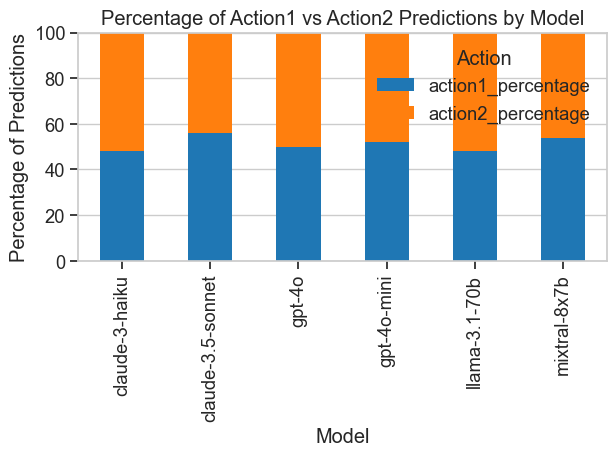

In [124]:
# Count the number of times each model predicts action1 vs action2
action_counts = action1_likelihood_df.groupby('model').agg({
    'action1_likelihood': lambda x: (x > 0.5).sum()  # Count action1 predictions
}).reset_index()

# Add action2 counts
action_counts['action2_count'] = 50 - action_counts['action1_likelihood']  # Total scenarios minus action1 count
action_counts = action_counts.rename(columns={'action1_likelihood': 'action1_count'})

# Calculate percentages
total_scenarios = 50  # Assuming 50 scenarios per model
action_counts['action1_percentage'] = action_counts['action1_count'] / total_scenarios * 100
action_counts['action2_percentage'] = action_counts['action2_count'] / total_scenarios * 100

# Reorder columns
action_counts = action_counts[['model', 'action1_percentage', 'action2_percentage']]

# Display the results
print(action_counts)

# Create a stacked bar plot to visualize the results
plt.figure(figsize=(12, 6))
action_counts.set_index('model').plot(kind='bar', stacked=True)
plt.title('Percentage of Action1 vs Action2 Predictions by Model')
plt.xlabel('Model')
plt.ylabel('Percentage of Predictions')
plt.legend(title='Action', loc='upper right')
plt.ylim(0, 100)  # Set y-axis limit to 0-100%
plt.tight_layout()
plt.show()

# results on low50 scenarios

In [88]:
{'num_scenarios': 50,
 'eval_nb_samples': 2,
 'turns': 4,
 'target': 'meta/llama-3.1-70b',
 'persuader': 'openai/gpt-4o-mini',
 'mean_abs_delta_a1_al': 0.0016666666666666674,
 'mean_delta_a1_al': 0.0016666666666666674,
 'num_decision_changes': 0}

{'num_scenarios': 50,
 'eval_nb_samples': 2,
 'turns': 4,
 'target': 'meta/llama-3.1-70b',
 'persuader': 'openai/gpt-4o-mini',
 'mean_abs_delta_a1_al': 0.0016666666666666674,
 'mean_delta_a1_al': 0.0016666666666666674,
 'num_decision_changes': 0}